# ECE 657 ASSIGNMENT 2: Problem 4
## KSOM

Harnoor Singh: 20870613  
Jubilee Imhanzenobe: 20809735  
Olohireme Ajayi: 20869827  

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating training data
X = np.empty((1,1,3), int)
Y = np.empty((1,1,3), int)

In [3]:
# shades of red
X = np.append(X , [[[255,0,0]]], 1)
X = np.append(X , [[[205,0,0]]], 1) #dark
X = np.append(X , [[[150,0,0]]], 1)
X = np.append(X , [[[255,50,50]]], 1) #light
X = np.append(X , [[[255,100,100]]], 1)

# shades of yellow
Y = np.append(Y , [[[255,255,0]]], 1) 
Y = np.append(Y , [[[205,205,0]]], 1) #dark
Y = np.append(Y , [[[255,255,150]]], 1) #light

# deleting first row that was randomly initialised while creating the array
X = np.delete(X,0,1)
Y = np.delete(Y,0,1)

In [4]:
X[0][3]

array([255,  50,  50])

In [5]:
# generating one final array by combining all shades
RY = np.append(X, Y, 1) # Red Yellow
GT = np.roll(RY, 1, 2) # Green Teal
BP = np.roll(GT, 1, 2) # Blue Pink

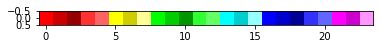

In [6]:
final_input_colors = np.append(RY, GT, axis = 1)
final_input_colors = np.append(final_input_colors, BP, axis = 1)
plt.imshow(final_input_colors)

In [7]:
final_input_colors.shape

(1, 24, 3)

In [8]:
# calibrating the color codes to values between 0 and 1
X_train = final_input_colors/ final_input_colors.max()
X_train = X_train.reshape(3, 24)

In [9]:
X_train.shape

(3, 24)

In [10]:
network_size = np.array([100, 100]) # dimensions of the network in 2D
n_epochs = 1000 # No. of epochs
learning_rate = 0.8 # initial learning rate
m = 3 # No. of rows
n = 24 # No. of columns

## Change value of sigma in the cell below

In [11]:
# sigma value must be in a list
sigmas = [1, 10, 30, 50, 70] # Change the value of sigma here

In [12]:
# function for learning rate decay with varying number of epochs
def learning_rate_decay(learning_rate, i, n_epochs):
    return learning_rate * np.exp(-i / n_epochs)

# function for radius decay with varying number of epochs
def radius_decay(sigma, i, n_epochs):
    return sigma * np.exp(-i / n_epochs)

# function for calculating the neighbourhood
def calculate_neighbourhood(distance, radius):
    return np.exp(-(distance**2) / (2* (radius**2)))

In [13]:
# function to find the winner neuron
def winning_neuron(t):
    t = t.reshape(1,-1)
    dist = np.sqrt(np.sum((weight_matrix - t)**2, axis=2))
    min_dist = np.min(dist)
    idx = np.where(dist == min_dist)
    idx = np.asarray(idx).T[0].flatten()
    winner_neuron = weight_matrix[idx[0], idx[1], :].reshape(m, 1)
    return (winner_neuron, idx)

In [14]:
x_dim = network_size[0]
y_dim = network_size[1]
z_dim = m
index_mat = np.array([[i,j] for i in range(x_dim) for j in range(y_dim)])

KSOM for Sigma:  1  Epoch =  1


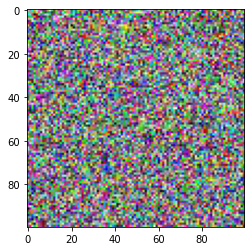

KSOM for Sigma:  1  Epoch =  20


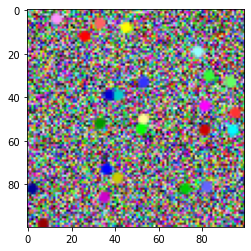

KSOM for Sigma:  1  Epoch =  40


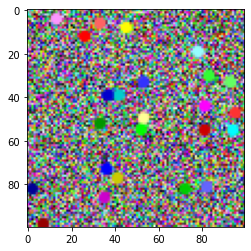

KSOM for Sigma:  1  Epoch =  100


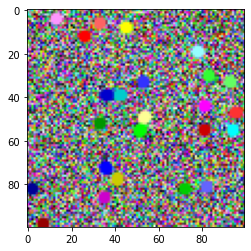

KSOM for Sigma:  1  Epoch =  1000


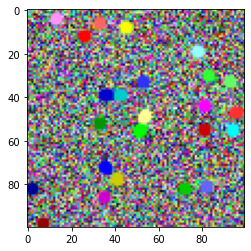

KSOM for Sigma:  10  Epoch =  1


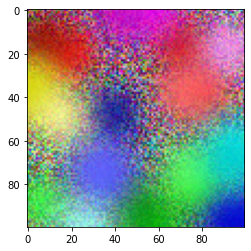

KSOM for Sigma:  10  Epoch =  20


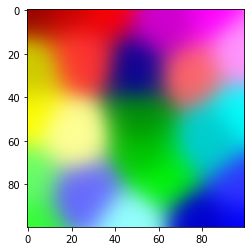

KSOM for Sigma:  10  Epoch =  40


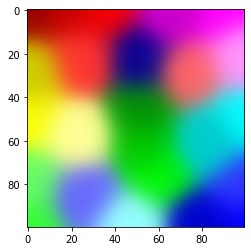

KSOM for Sigma:  10  Epoch =  100


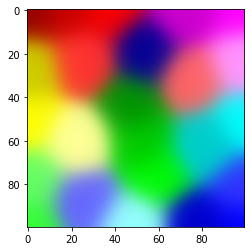

KSOM for Sigma:  10  Epoch =  1000


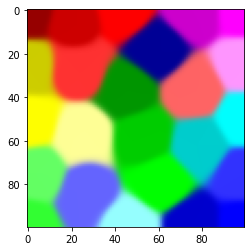

KSOM for Sigma:  30  Epoch =  1


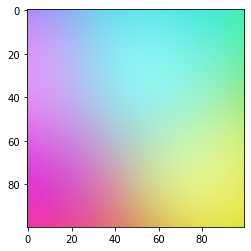

KSOM for Sigma:  30  Epoch =  20


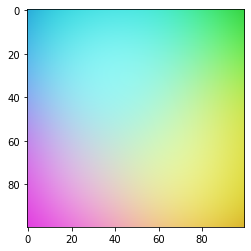

KSOM for Sigma:  30  Epoch =  40


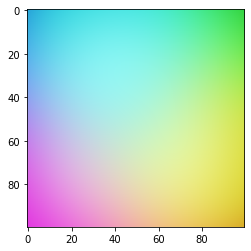

KSOM for Sigma:  30  Epoch =  100


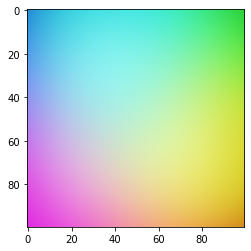

KSOM for Sigma:  30  Epoch =  1000


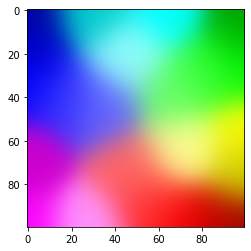

KSOM for Sigma:  50  Epoch =  1


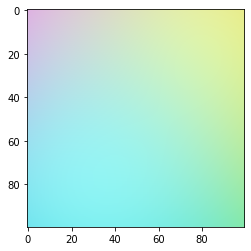

KSOM for Sigma:  50  Epoch =  20


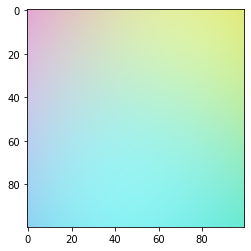

KSOM for Sigma:  50  Epoch =  40


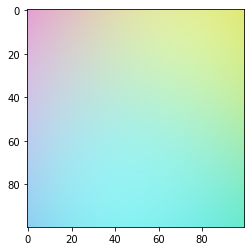

KSOM for Sigma:  50  Epoch =  100


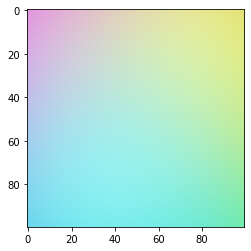

KSOM for Sigma:  50  Epoch =  1000


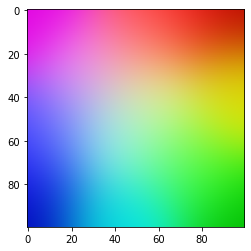

KSOM for Sigma:  70  Epoch =  1


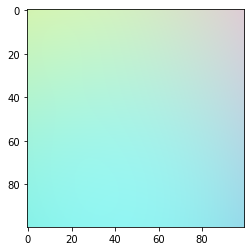

KSOM for Sigma:  70  Epoch =  20


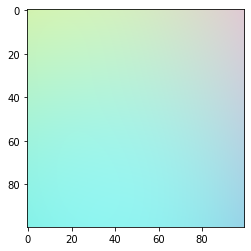

KSOM for Sigma:  70  Epoch =  40


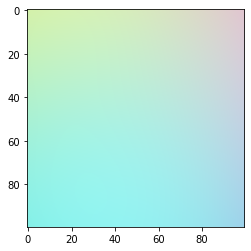

KSOM for Sigma:  70  Epoch =  100


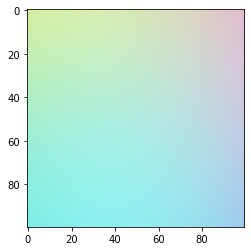

KSOM for Sigma:  70  Epoch =  1000


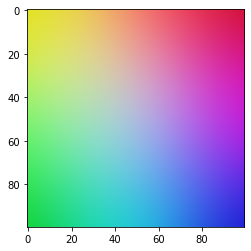

In [15]:
sigmas_results = []
for sigma in sigmas:
    # initializing the weight matrix in 3D
    weight_matrix = np.random.random((network_size[0], network_size[1], m))
    sigma_dict = {}
    for i in range(n_epochs):
        
        # decaying sigma and learning rate
        sigma_i = radius_decay(sigma, i, n_epochs)
        learning_rate_i = learning_rate_decay(learning_rate, i, n_epochs)
        
        # training the nwetwork on input data
        for j in range(24):
            
            # getting input data
            t = X_train[:, j].reshape(np.array([m, 1]))

            # finding winner neuron and winner index
            winner_neuron, winner_index = winning_neuron(t)
            
            # updating weight parameters
            winner_neuron, winner_index = winning_neuron(t)
            dist = np.sqrt(np.sum((index_mat - winner_index) ** 2, axis=1))
            neighbourhood_influence = calculate_neighbourhood(dist, sigma_i)
            weight_matrix = weight_matrix + ((learning_rate_i * (neighbourhood_influence).reshape(-1,1) * (t.reshape(1,-1) - weight_matrix).reshape(x_dim*y_dim, z_dim))).reshape(x_dim,y_dim,z_dim)
            
          
        # printing weights matrix at desired epochs
        if(i==0 or i==19 or i==39 or i==99 or  i==999):
            print("KSOM for Sigma: ", str(sigma), " Epoch = ", str(i+1))
            
            # storing weights in dictionary so as to save the weights for later use
            sigma_dict[i+1] = np.copy(weight_matrix) 
            
            # printing weight grid
            plt.figure()
            plt.imshow(weight_matrix)
            plt.show()
    
    sigmas_results.append(sigma_dict)

In [17]:
epochs = [1, 20, 40, 100, 1000]
i = 0

for sigma_dict in sigmas_results:
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(18, ))
    
    ax1.imshow(sigma_dict[epochs[0]])
    title = "SIGMA = "+ str(sigmas[i]) + " Epoch = " + str(epochs[0])
    ax1.set_title(title)
    
    ax2.imshow(sigma_dict[epochs[1]])
    title = "SIGMA = "+ str(sigmas[i]) + " Epoch = " + str(epochs[1])
    ax2.set_title(title)

    ax3.imshow(sigma_dict[epochs[2]])
    title = "SIGMA = "+ str(sigmas[i]) + " Epoch = " + str(epochs[2])
    ax3.set_title(title)

    ax4.imshow(sigma_dict[epochs[3]])
    title = "SIGMA = "+ str(sigmas[i]) + " Epoch = " + str(epochs[3])
    ax4.set_title(title)

    ax5.imshow(sigma_dict[epochs[4]])
    title = "SIGMA = "+ str(sigmas[i]) + " Epoch = " + str(epochs[4])
    ax5.set_title(title)

    i += 1 


TypeError: from_bounds() missing 1 required positional argument: 'height'

### Conclusion on the Effects of Sigma

The Neighbourhood size decreases with an increase in sigma. 

#### Sigma = 1
- Epochs = 1: There is no visible mapping from inputs to outputs.
- Epochs = 20: Some neurons have been accurately mapped to inputs. There are 24 visible clusters of neurons. 
- Epochs = 40: The distance between visible clusters is smaller than the distance between the clusters at 20 epochs.
- Epochs = 100: The clusters are continue to coverge into each other.
- Epochs = 1000: Two pairs of clusters are joined to each other.

#### Sigma = 10
- Epochs = 1: The are large cluster represented by noisy and blurry blobs, the boundaries of the clusters don't seem to mapped.
- Epochs = 20: The initial noise has been removed, the clusters are smooth with clear boundaries.
- Epochs = 40: The colours of the clusters are more intense.
- Epochs = 100: It looks the same as after 40 epochs, with a slight increase in intesity.
- Epochs = 1000: The clusters are represented by smooth blobs with very distinct boundaries. 

#### Sigma = 30
- Epochs = 1: The colour clusters blend into one another, but one can make out the boundaries. There are fewer colour clusters that there were when sigma was < 30.
- Epochs = 20: The colour clusters blend even more and there is one less colour.
- Epochs = 40: The colour clusters blend into one another and resemble a gradient. 
- Epochs = 100:  The colour clusters blend into one another and resemble a gradient.
- Epochs = 1000: The clusters are represented by blurry blobs with very clearer boundaries. 

#### Sigma = 50
- Epochs = 1: The colour clusters blend into one another and resemble a gradient. 
- Epochs = 20: The colour clusters blend into one another and resemble a gradient. Another colour cluster emerges. 
- Epochs = 40: The colour clusters blend into one another and resemble a gradient. The individual colour clusters become more distinct. 
- Epochs = 100: The colour clusters blend into one another and resemble a gradient. The individual colour clusters become more distinct. 
- Epochs = 1000: The clusters are represented by very blurry blobs with very weak boundaries. There are less colours than (Sigma = 30)

#### Sigma = 70
- Epochs = 1: The colour clusters blend into one another and resemble a gradient. There are less visible distinct colours compared to sigma = 50
- Epochs = 20: The colour clusters blend into one another and resemble a gradient. The individual colour clusters become more distinct.
- Epochs = 40: The colour clusters blend into one another and resemble a gradient. The individual colour clusters become more distinct.
- Epochs = 100: The colour clusters blend into one another and resemble a gradient. The individual colour clusters become more distinct.
- Epochs = 1000: The clusters are represented by distinct colours blending into one another. 

### When sigma is too small, the clusters do not converge properly. When sigma is too large the network may map input to too few dimensions
### In the network above, the best mapping occurs at Sigma = 30 after 1000 epochs

There is a relation between the learning of SOM and number of epochs. It can be clearly seen that the maximum learning is obtained at 1000 epochs. At 20 epochs, learning is very little and output is far away from the goal. At about 100 epochs, little blending and separation of colors could be seen. Considering the example of sigma = 50, after 100th epoch, still a sort of few solid colors is seen. More learning is required to get the desired output.  After 1000 epochs, the output is shown above is closed to the desired output. So, number of epochs should be choosen wisely along with sigma parameter to get the desired results. The learning of SOM depends heavily on these parameters.